In [12]:
import pandas as pd

In [13]:
blueprinty = pd.read_csv('blueprinty.csv')
blueprinty.head(5)

,patents,region,age,iscustomer
0,0,Midwest,32.5,0
1,3,Southwest,37.5,0
2,4,Northwest,27.0,1
3,3,Northeast,24.5,0
4,3,Southwest,37.0,0


Mean number of patents by customer status:
iscustomer
0    3.473013
1    4.133056
Name: patents, dtype: float64


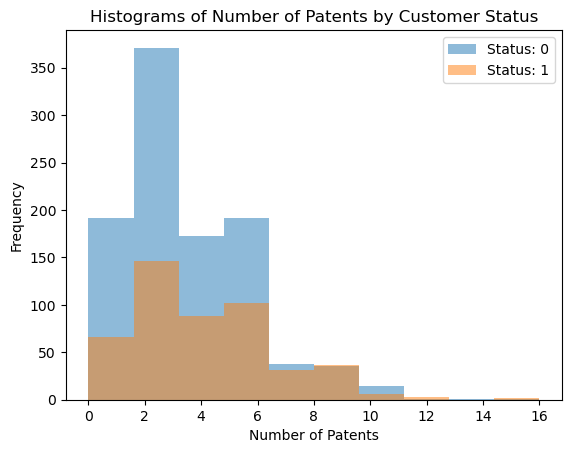

In [14]:
import matplotlib.pyplot as plt

# Group data by customer status and calculate the mean
means = blueprinty.groupby('iscustomer')['patents'].mean()
print("Mean number of patents by customer status:")
print(means)

# Plot histograms for each customer status
statuses = blueprinty['iscustomer'].unique()
for status in statuses:
    subset = blueprinty[blueprinty['iscustomer'] == status]
    plt.hist(subset['patents'], alpha=0.5, label=f'Status: {status}')

plt.xlabel('Number of Patents')
plt.ylabel('Frequency')
plt.title('Histograms of Number of Patents by Customer Status')
plt.legend()
plt.show()

/tmp/ipykernel_27691/1092680387.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=blueprinty, x="iscustomer", y="patents", palette="Set1", estimator=np.mean)


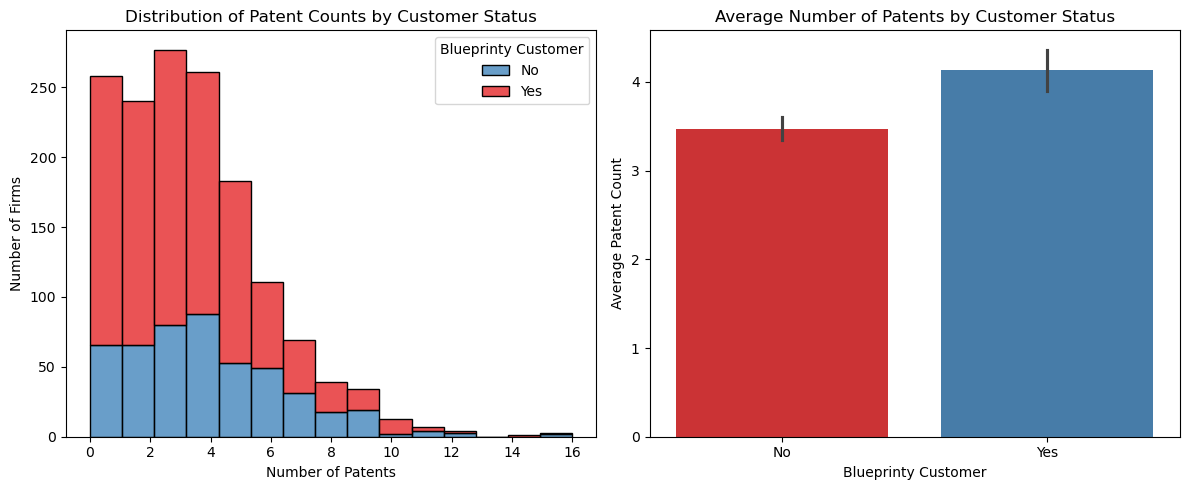

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=blueprinty, x="patents",hue='iscustomer', kde=False, bins=15, palette="Set1", multiple="stack")
plt.title("Distribution of Patent Counts by Customer Status")
plt.xlabel("Number of Patents")
plt.ylabel("Number of Firms")
plt.legend(title="Blueprinty Customer", labels=["No", "Yes"])

plt.subplot(1, 2, 2)
sns.barplot(data=blueprinty, x="iscustomer", y="patents", palette="Set1", estimator=np.mean)
plt.title("Average Number of Patents by Customer Status")
plt.xlabel("Blueprinty Customer")
plt.ylabel("Average Patent Count")
plt.xticks([0, 1], ["No", "Yes"])

plt.tight_layout()
plt.show()

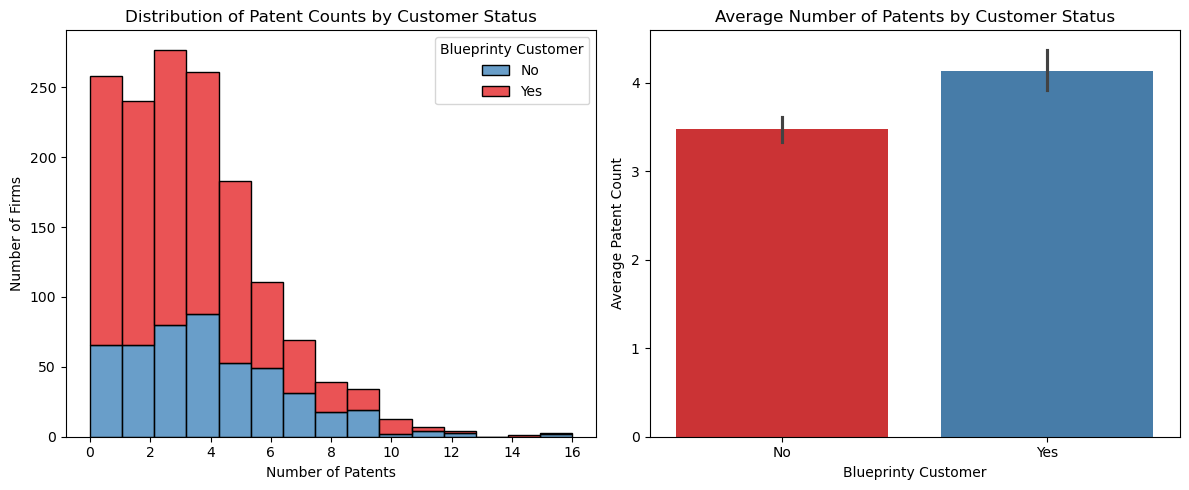

In [16]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=blueprinty, x="patents", hue='iscustomer', kde=False, bins=15, palette="Set1", multiple="stack")
plt.title("Distribution of Patent Counts by Customer Status")
plt.xlabel("Number of Patents")
plt.ylabel("Number of Firms")
plt.legend(title="Blueprinty Customer", labels=["No", "Yes"])

plt.subplot(1, 2, 2)
sns.barplot(data=blueprinty, x="iscustomer", y="patents", hue="iscustomer", palette="Set1", estimator=np.mean, dodge=False, legend=False)
plt.title("Average Number of Patents by Customer Status")
plt.xlabel("Blueprinty Customer")
plt.ylabel("Average Patent Count")
plt.xticks([0, 1], ["No", "Yes"])

plt.tight_layout()
plt.show()

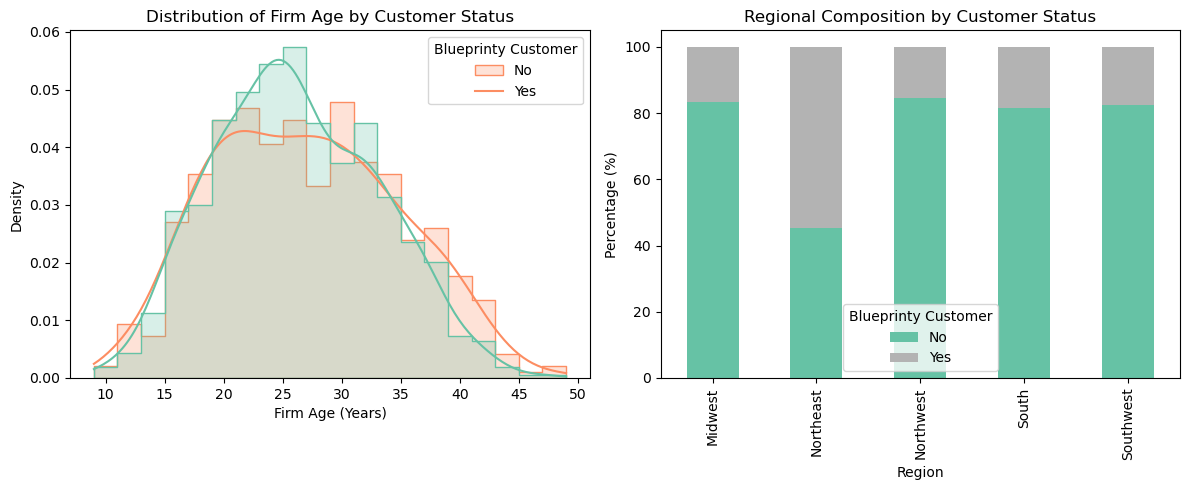

In [17]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=blueprinty, x="age", hue="iscustomer", kde=True, bins=20, palette="Set2", element="step", stat="density", common_norm=False)
plt.title("Distribution of Firm Age by Customer Status")
plt.xlabel("Firm Age (Years)")
plt.ylabel("Density")
plt.legend(title="Blueprinty Customer", labels=["No", "Yes"])

plt.subplot(1, 2, 2)
region_counts = pd.crosstab(blueprinty["region"], blueprinty["iscustomer"], normalize="index") * 100
region_counts.plot(kind="bar", stacked=True, ax=plt.gca(), colormap="Set2")
plt.title("Regional Composition by Customer Status")
plt.xlabel("Region")
plt.ylabel("Percentage (%)")
plt.legend(title="Blueprinty Customer", labels=["No", "Yes"])

plt.tight_layout()
plt.show()

In [18]:
from sympy import symbols, factorial, exp

# Define variables
Y, lam = symbols('Y lambda', positive=True)

# Define the likelihood function
likelihood = (exp(-lam) * lam**Y) / factorial(Y)
likelihood

lambda**Y*exp(-lambda)/factorial(Y)

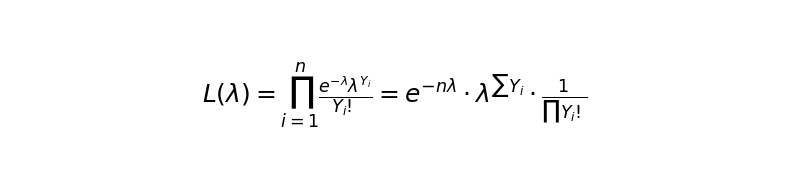

In [19]:
import matplotlib.pyplot as plt

# 顯示數學公式：Poisson likelihood 展開形式
fig, ax = plt.subplots(figsize=(8, 2))

text = r"$L(\lambda) = \prod_{i=1}^n \frac{e^{-\lambda} \lambda^{Y_i}}{Y_i!} = e^{-n\lambda} \cdot \lambda^{\sum Y_i} \cdot \frac{1}{\prod Y_i!}$"

ax.text(0.5, 0.5, text, fontsize=18, ha='center', va='center')
ax.axis('off')
plt.tight_layout()
plt.show()

In [20]:
from IPython.display import display, Math

display(Math(r"L(\lambda) = \prod_{i=1}^n \frac{e^{-\lambda} \lambda^{Y_i}}{Y_i!} = e^{-n\lambda} \cdot \lambda^{\sum Y_i} \cdot \frac{1}{\prod Y_i!}"))

<IPython.core.display.Math object>

In [21]:
from sympy import log

log_likelihood = log(likelihood)
log_likelihood

log(lambda**Y*exp(-lambda)/factorial(Y))

In [22]:
from sympy import lambdify

def poisson_loglikelihood(lam_val, Y_val):
    # Convert the symbolic log-likelihood to a numerical function
    log_likelihood_func = lambdify((lam, Y), log_likelihood, 'numpy')
    return log_likelihood_func(lam_val, Y_val)

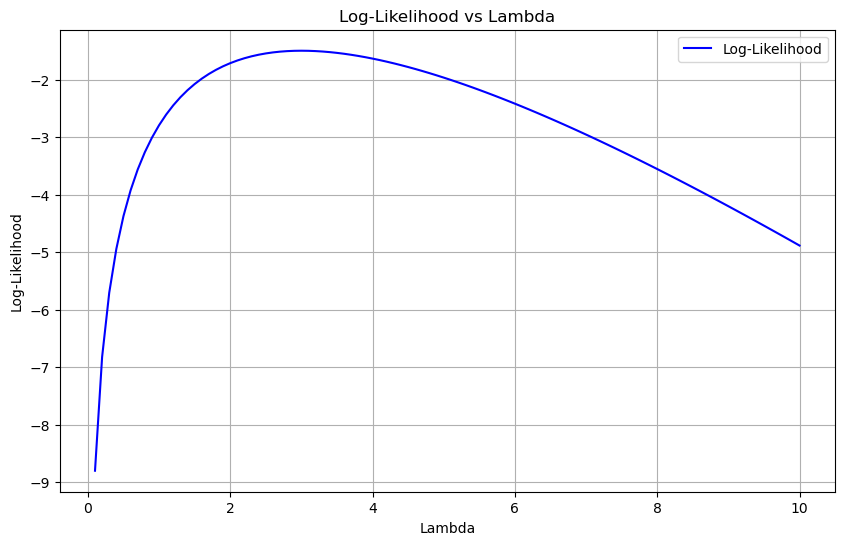

In [23]:
import numpy as np

import matplotlib.pyplot as plt

# Define a range of lambda values
lambda_values = np.linspace(0.1, 10, 100)

# Use the observed number of patents as the input for Y
observed_patents = int(blueprinty['patents'].mean())

# Calculate the log-likelihood for each lambda value
log_likelihood_values = [poisson_loglikelihood(lam_val, observed_patents) for lam_val in lambda_values]

# Plot the log-likelihood
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, log_likelihood_values, label='Log-Likelihood', color='blue')
plt.xlabel('Lambda')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood vs Lambda')
plt.legend()
plt.grid()
plt.show()

In [24]:
from IPython.display import display, Math

def display_poisson_loglikelihood_formula(lmbda, Y):
    if lmbda <= 0:
        display(Math(r"\text{Invalid: } \lambda \leq 0"))
        return
    n = len(Y)
    sum_y = np.sum(Y)
    sum_log_fact_y = np.sum(np.log(factorial(Y)))

    # 組成 LaTeX 公式字串
    formula = (
        r"\log L(\lambda) = "
        + f"-{n}\\cdot {lmbda:.3f} + {sum_y}\\cdot \log({lmbda:.3f}) - {sum_log_fact_y:.3f}"
    )
    display(Math(formula))

<>:14: SyntaxWarning: invalid escape sequence '\l'
<>:14: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_27691/1317870001.py:14: SyntaxWarning: invalid escape sequence '\l'
  + f"-{n}\\cdot {lmbda:.3f} + {sum_y}\\cdot \log({lmbda:.3f}) - {sum_log_fact_y:.3f}"


In [25]:
import numpy as np
from scipy.special import factorial

def poisson_loglikelihood(lmbda, Y):
    if lmbda <= 0:
        return -np.inf
    n = len(Y)
    return -n * lmbda + np.sum(Y * np.log(lmbda)) - np.sum(np.log(factorial(Y)))
from IPython.display import display, Math

def display_poisson_loglikelihood_formula(lmbda, Y):
    if lmbda <= 0:
        display(Math(r"\text{Invalid: } \lambda \leq 0"))
        return
    n = len(Y)
    sum_y = np.sum(Y)
    sum_log_fact_y = np.sum(np.log(factorial(Y)))

    # 組成 LaTeX 公式字串
    formula = (
        r"\log L(\lambda) = "
        + f"-{n}\\cdot {lmbda:.3f} + {sum_y}\\cdot \log({lmbda:.3f}) - {sum_log_fact_y:.3f}"
    )
    display(Math(formula))

<>:22: SyntaxWarning: invalid escape sequence '\l'
<>:22: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_27691/295458998.py:22: SyntaxWarning: invalid escape sequence '\l'
  + f"-{n}\\cdot {lmbda:.3f} + {sum_y}\\cdot \log({lmbda:.3f}) - {sum_log_fact_y:.3f}"


In [26]:
import sympy as sp
from IPython.display import display, Math

# 定義符號變數
lmbda, n, sum_y = sp.symbols('lambda n sum_y', positive=True)

# 定義 log-likelihood 函數（忽略常數項）
log_likelihood = -n * lmbda + sum_y * sp.log(lmbda)

# 微分
d_log_likelihood = sp.diff(log_likelihood, lmbda)

# 解方程：令導數為 0，解出 lambda
solution = sp.solve(d_log_likelihood, lmbda)[0]

# 用 Latex 格式輸出步驟
display(Math(r"\textbf{Step 1: Define the log-likelihood function}"))
display(Math(r"\log L(\lambda) = -n\lambda + \left(\sum Y_i\right)\log \lambda"))

display(Math(r"\textbf{Step 2: Take the first derivative}"))
display(Math(r"\frac{d}{d\lambda} \log L(\lambda) = -n + \frac{\sum Y_i}{\lambda}"))

display(Math(r"\textbf{Step 3: Set the derivative equal to zero and solve for } \lambda"))
display(Math(r"0 = -n + \frac{\sum Y_i}{\lambda} \Rightarrow \hat{\lambda}_{\text{MLE}} = \frac{\sum Y_i}{n} = \bar{Y}"))

# 顯示解
display(Math(r"\boxed{\hat{\lambda}_{\text{MLE}} = " + sp.latex(solution) + r"}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [27]:
from scipy.optimize import minimize

# 定義負的 log-likelihood 函數
def neg_loglikelihood(lmbda):
    return -poisson_loglikelihood(lmbda[0], Y)

# 使用 minimize 找最小值（即最大 log-likelihood）
result = minimize(neg_loglikelihood, x0=[1.0], bounds=[(1e-6, None)])
lambda_mle = result.x[0]

/tmp/ipykernel_27691/295458998.py:22: SyntaxWarning: invalid escape sequence '\l'
  + f"-{n}\\cdot {lmbda:.3f} + {sum_y}\\cdot \log({lmbda:.3f}) - {sum_log_fact_y:.3f}"


TypeError: object of type 'Symbol' has no len()

In [ ]:
from scipy.optimize import minimize

# Define the negative log-likelihood function
def neg_log_likelihood(lmbda):
    return -np.sum(Y * np.log(lmbda) - lmbda - np.log(factorial(Y)))

# Use minimize to find the MLE
result = minimize(neg_log_likelihood, x0=[1.0], bounds=[(1e-6, None)])
lambda_mle = result.x[0]

print(f"MLE for lambda: {lambda_mle}")

MLE for lambda: 3.684666485763343


In [ ]:
import numpy as np

def poisson_regression_loglikelihood(beta, Y, X):
    """
    Compute the log-likelihood for a Poisson regression model.

    Parameters:
    beta (numpy.ndarray): Coefficient vector (shape: p, where p is the number of covariates).
    Y (numpy.ndarray): Response variable (shape: n, where n is the number of observations).
    X (numpy.ndarray): Covariate matrix (shape: n x p).

    Returns:
    float: Log-likelihood value.
    """
    # Compute the linear predictor X @ beta
    linear_predictor = X @ beta
    
    # Apply the inverse link function (exp) to get lambda_i
    lambda_i = np.exp(linear_predictor)
    
    # Compute the log-likelihood
    log_likelihood = np.sum(Y * np.log(lambda_i) - lambda_i - np.log(np.math.factorial(Y)))
    
    return log_likelihood

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from scipy.linalg import inv

# Prepare the design matrix X
blueprinty['age_squared'] = blueprinty['age'] ** 2
X = pd.get_dummies(blueprinty[['age', 'age_squared', 'region', 'iscustomer']], drop_first=True)
X.insert(0, 'Intercept', 1)  # Add a column of 1's for the intercept
X = X.astype(float).values  # Ensure all values are numeric and convert to numpy array

# Response variable
Y = blueprinty['patents'].values

# Define the negative log-likelihood function for Poisson regression
def poisson_neg_loglikelihood(beta, Y, X):
    linear_predictor = X @ beta
    lambda_i = np.exp(linear_predictor)
    return -np.sum(Y * np.log(lambda_i) - lambda_i)

# Initial guess for beta
initial_beta = np.zeros(X.shape[1])

# Optimize to find the MLE
result = minimize(poisson_neg_loglikelihood, initial_beta, args=(Y, X), method='BFGS')

# Extract the MLE vector and Hessian
beta_mle = result.x
hessian = result.hess_inv  # Inverse Hessian from BFGS

# Compute standard errors
standard_errors = np.sqrt(np.diag(hessian))

# Create a table of coefficients and standard errors
coefficients_table = pd.DataFrame({
    'Coefficient': beta_mle,
    'Standard Error': standard_errors
}, index=['Intercept'] + list(pd.get_dummies(blueprinty[['age', 'age_squared', 'region', 'iscustomer']], drop_first=True).columns))

print(coefficients_table)

                  Coefficient  Standard Error
Intercept            1.480059             1.0
age                 38.016417             1.0
age_squared       1033.539585             1.0
iscustomer           0.553874             1.0
region_Northeast     0.640979             1.0
region_Northwest     0.164288             1.0
region_South         0.181562             1.0
region_Southwest     0.295497             1.0


/tmp/ipykernel_18929/225714958.py:18: RuntimeWarning: overflow encountered in exp
  lambda_i = np.exp(linear_predictor)
/tmp/ipykernel_18929/225714958.py:19: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(Y * np.log(lambda_i) - lambda_i)
/tmp/ipykernel_18929/225714958.py:19: RuntimeWarning: invalid value encountered in subtract
  return -np.sum(Y * np.log(lambda_i) - lambda_i)
/opt/conda/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipykernel_18929/225714958.py:18: RuntimeWarning: overflow encountered in exp
  lambda_i = np.exp(linear_predictor)
/tmp/ipykernel_18929/225714958.py:19: RuntimeWarning: invalid value encountered in multiply
  return -np.sum(Y * np.log(lambda_i) - lambda_i)
/tmp/ipykernel_18929/225714958.py:19: RuntimeWarning: invalid value encountered in subtract
  return -np.sum(Y * np.log(lambda_i) - lambda_i)
/opt/conda/lib/p

In [ ]:
blueprinty["age_std"] = (blueprinty["age"] - blueprinty["age"].mean()) / blueprinty["age"].std()
blueprinty["age_squared_std"] = blueprinty["age_std"] ** 2

# 建立 region dummy 變數（去掉 baseline 類別，例如 Midwest）
region_dummies = pd.get_dummies(blueprinty["region"], drop_first=True)

# 建立設計矩陣 X（含截距、標準化變數與 dummy）
X = pd.concat([
    pd.Series(1, index=blueprinty.index, name="intercept"),
    blueprinty[["age_std", "age_squared_std", "iscustomer"]],
    region_dummies
], axis=1)

X_mat = X.astype(float).values  # Ensure all values are numeric and convert to numpy array
Y = blueprinty["patents"].values
n, k = X_mat.shape

# 定義 Poisson log-likelihood 函數（同前）
def poisson_regression_loglikelihood(beta, Y, X):
    lin_pred = X @ beta
    lambda_i = np.exp(lin_pred)
    return np.sum(Y * np.log(lambda_i) - lambda_i - np.log(factorial(Y)))

# 負的 log-likelihood（for minimization）
def neg_log_likelihood(beta):
    return -poisson_regression_loglikelihood(beta, Y, X_mat)

# 最小化（使用 BFGS 以便取得 Hessian）
beta_init = np.zeros(k)
result = minimize(neg_log_likelihood, x0=beta_init, method='BFGS')

# 取得估計值與標準誤
beta_hat = result.x
hessian_inv = result.hess_inv  # 近似的逆 Hessian
se_beta = np.sqrt(np.diag(hessian_inv))

# 建立結果表格
mle_table = pd.DataFrame({
    "Variable": X.columns,
    "Estimate": beta_hat,
    "Std. Error": se_beta
})
mle_table

,Variable,Estimate,Std. Error
0,intercept,1.344676,0.037181
1,age_std,-0.057723,0.016104
2,age_squared_std,-0.155814,0.021726
3,iscustomer,0.207591,0.048531
4,Northeast,0.029170,0.063337
5,Northwest,-0.017575,0.055881
6,South,0.056561,0.058004
7,Southwest,0.050576,0.048037


In [ ]:
import statsmodels.api as sm

# 建立新的資料集，將 age 做標準化並建立 age_squared
blueprinty["age_std"] = (blueprinty["age"] - blueprinty["age"].mean()) / blueprinty["age"].std()
blueprinty["age_squared_std"] = blueprinty["age_std"] ** 2

# 建立地區虛擬變數（drop_first 代表設定 baseline）
region_dummies = pd.get_dummies(blueprinty["region"], drop_first=True)

# 合併設計矩陣
X_sm = pd.concat([
    blueprinty[["age_std", "age_squared_std", "iscustomer"]],
    region_dummies
], axis=1)

# 確保所有數據為數值型
X_sm = X_sm.astype(float)

# 加入截距項
X_sm = sm.add_constant(X_sm)

# 定義應變數
Y = blueprinty["patents"]

# 建立 Poisson 回歸模型
model = sm.GLM(Y, X_sm, family=sm.families.Poisson())
result = model.fit()

# 顯示結果摘要
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                patents   No. Observations:                 1500
Model:                            GLM   Df Residuals:                     1492
Model Family:                 Poisson   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3258.1
Date:                Fri, 02 May 2025   Deviance:                       2143.3
Time:                        01:29:04   Pearson chi2:                 2.07e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1360
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.3447      0.038     35.059      0.000       1.270       1.420
age_std            -0.0577      0.015     -3.843      0.000      -0.087      -0.028
age_squared_std    -0.1558      0.014    -11.513      0.000      -0.182      -0.129
iscustomer          0.2076      0.031      6.719      0.000       0.147       0.268
Northeast           0.0292      0.044      0.669      0.504      -0.056       0.115
Northwest          -0.0176      0.054     -0.327      0.744      -0.123       0.088
South               0.0566      0.053      1.074      0.283      -0.047       0.160
Southwest           0.0506      0.047      1.072      0.284      -0.042       0.143
===================================================================================
"""

In [32]:
import statsmodels.api as sm

blueprinty["age_std"] = (blueprinty["age"] - blueprinty["age"].mean()) / blueprinty["age"].std()
blueprinty["age_squared_std"] = blueprinty["age_std"] ** 2

region_dummies = pd.get_dummies(blueprinty["region"], drop_first=True)

X_sm = pd.concat([
    blueprinty[["age_std", "age_squared_std", "iscustomer"]],
    region_dummies
], axis=1)

X_sm = X_sm.astype(float)

X_sm = sm.add_constant(X_sm)

Y = blueprinty["patents"]

model = sm.GLM(Y, X_sm, family=sm.families.Poisson())
result = model.fit()
# 擷取回歸摘要表格，並只保留與截圖中對應的欄位
summary_df = result.summary2().tables[1].reset_index()
summary_df = summary_df.rename(columns={
    "index": "Variable",
    "Coef.": "coef",
    "Std.Err.": "std err",
    "P>|z|": "P>|z|",
    "[0.025": "[0.025",
    "0.975]": "0.975]"
})

summary_df


,Variable,coef,std err,z,P>|z|,[0.025,0.975]
0,const,1.344676,0.038355,35.058706,2.872890e-269,1.269501,1.419850
1,age_std,-0.057723,0.015020,-3.843138,1.214711e-04,-0.087162,-0.028285
2,age_squared_std,-0.155814,0.013533,-11.513237,1.131496e-30,-0.182339,-0.129289
3,iscustomer,0.207591,0.030895,6.719179,1.827509e-11,0.147037,0.268144
4,Northeast,0.029170,0.043625,0.668647,5.037205e-01,-0.056334,0.114674
5,Northwest,-0.017575,0.053781,-0.326782,7.438327e-01,-0.122983,0.087833
6,South,0.056561,0.052662,1.074036,2.828066e-01,-0.046655,0.159778
7,Southwest,0.050576,0.047198,1.071568,2.839141e-01,-0.041931,0.143083


In [ ]:
import pandas as pd
airbnb = pd.read_csv('airbnb.csv')
airbnb.head(5)

,Unnamed: 0,id,days,last_scraped,host_since,room_type,bathrooms,bedrooms,price,number_of_reviews,review_scores_cleanliness,review_scores_location,review_scores_value,instant_bookable
0,1,2515,3130,4/2/2017,9/6/2008,Private room,1.0,1.0,59,150,9.0,9.0,9.0,f
1,2,2595,3127,4/2/2017,9/9/2008,Entire home/apt,1.0,0.0,230,20,9.0,10.0,9.0,f
2,3,3647,3050,4/2/2017,11/25/2008,Private room,1.0,1.0,150,0,NaN,NaN,NaN,f
3,4,3831,3038,4/2/2017,12/7/2008,Entire home/apt,1.0,1.0,89,116,9.0,9.0,9.0,f
4,5,4611,3012,4/2/2017,1/2/2009,Private room,NaN,1.0,39,93,9.0,8.0,9.0,t


## Airbnb

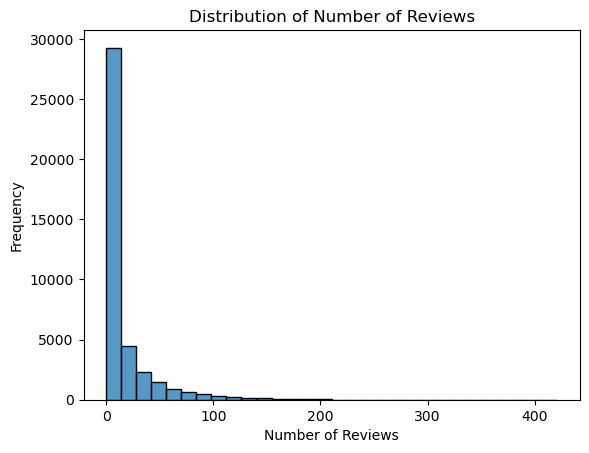

                 Generalized Linear Model Regression Results                  
Dep. Variable:      number_of_reviews   No. Observations:                40395
Model:                            GLM   Df Residuals:                    40388
Model Family:                 Poisson   Df Model:                            6
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -7.1425e+05
Date:                Fri, 02 May 2025   Deviance:                   1.3053e+06
Time:                        02:14:57   Pearson chi2:                 2.13e+06
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4279
Covariance Type:            nonrobust                                         
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2

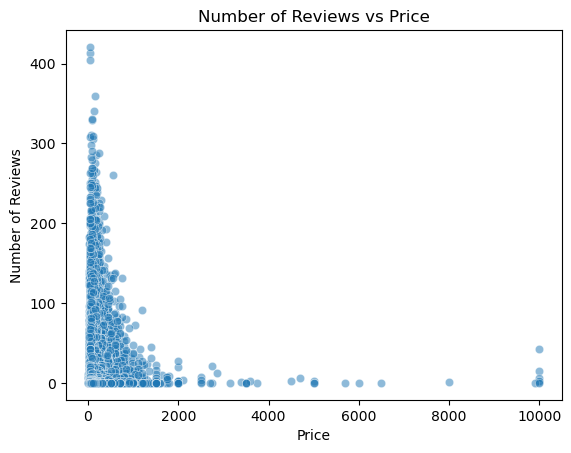

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import statsmodels.api as sm
import matplotlib.pyplot as plt

# Step 1: Exploratory Data Analysis (EDA)
# Visualize the distribution of the number of reviews
sns.histplot(airbnb['number_of_reviews'], bins=30, kde=False)
plt.title('Distribution of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

# Step 2: Handle Missing Values
# Select relevant variables
relevant_columns = ['number_of_reviews', 'price', 'room_type', 'bedrooms', 'bathrooms', 'instant_bookable']
airbnb_cleaned = airbnb[relevant_columns].dropna()

# Convert categorical variables to dummy variables
airbnb_cleaned = pd.get_dummies(airbnb_cleaned, columns=['room_type', 'instant_bookable'], drop_first=True)

# Step 3: Build a Poisson Regression Model
# Define response variable (Y) and predictors (X)
Y = airbnb_cleaned['number_of_reviews']
X = airbnb_cleaned.drop(columns=['number_of_reviews'])

# Ensure all columns in X are numeric
X = X.apply(pd.to_numeric, errors='coerce')

# Convert boolean columns to integers
for col in X.select_dtypes(include=['bool']).columns:
	X[col] = X[col].astype(int)

# Drop rows with any NaN values after conversion
X = X.dropna()

# Check for any remaining non-numeric data
if not all(X.dtypes.apply(lambda dtype: np.issubdtype(dtype, np.number))):
	raise ValueError("Non-numeric data found in predictors. Please check the input data.")

# Add intercept
X = sm.add_constant(X)

# Fit the Poisson regression model
poisson_model = sm.GLM(Y, X, family=sm.families.Poisson())
poisson_results = poisson_model.fit()

# Step 4: Interpret Model Coefficients
# Display model summary
print(poisson_results.summary())

# Visualize the relationship between price and number of reviews
sns.scatterplot(data=airbnb_cleaned, x='price', y='number_of_reviews', alpha=0.5)
plt.title('Number of Reviews vs Price')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.show()

In [ ]:
# Count missing values for each column in the airbnb dataset
missing_values = airbnb.isnull().sum()
print("Missing values count for each column:")
missing_values

Missing values count for each column:


Unnamed: 0                       0
id                               0
days                             0
last_scraped                     0
host_since                      35
room_type                        0
bathrooms                      160
bedrooms                        76
price                            0
number_of_reviews                0
review_scores_cleanliness    10195
review_scores_location       10254
review_scores_value          10256
instant_bookable                 0
dtype: int64

In [ ]:
# Create a DataFrame from the missing_values Series
missing_values_df = missing_values.reset_index()
missing_values_df.columns = ['Column', 'Missing Values']
missing_values_df

                       Column  Missing Values
0                  Unnamed: 0               0
1                          id               0
2                        days               0
3                last_scraped               0
4                  host_since              35
5                   room_type               0
6                   bathrooms             160
7                    bedrooms              76
8                       price               0
9           number_of_reviews               0
10  review_scores_cleanliness           10195
11     review_scores_location           10254
12        review_scores_value           10256
13           instant_bookable               0


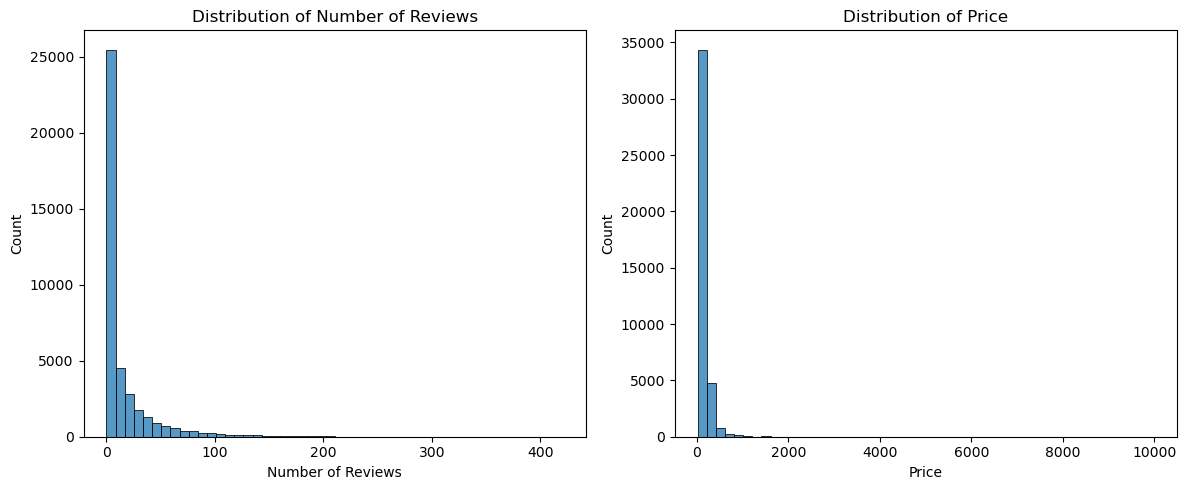

In [ ]:
# Step 3: 轉換類別變數為數值（instant_bookable: "t"/"f" → 1/0）
airbnb_cleaned["instant_bookable_t"] = airbnb_cleaned["instant_bookable_t"].astype(int)

# Step 4: 描述統計與簡單分布圖示
summary_stats = airbnb_cleaned.describe()

# 畫出評論數與價格的分佈
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(airbnb_cleaned["number_of_reviews"], bins=50, kde=False)
plt.title("Distribution of Number of Reviews")
plt.xlabel("Number of Reviews")

plt.subplot(1, 2, 2)
sns.histplot(airbnb_cleaned["price"], bins=50, kde=False)
plt.title("Distribution of Price")
plt.xlabel("Price")

plt.tight_layout()
plt.show()

In [ ]:
cols_needed = [
    "price", "number_of_reviews", "instant_bookable", "room_type",
    "review_scores_cleanliness", "review_scores_location",
    "review_scores_value", "bathrooms", "bedrooms"
]
airbnb_cleaned = airbnb.dropna(subset=cols_needed).copy()

airbnb_cleaned["log_price"] = np.log1p(airbnb_cleaned["price"])

airbnb_cleaned["instant_bookable"] = airbnb_cleaned["instant_bookable"].fillna("f")
airbnb_cleaned["instant_bookable"] = airbnb_cleaned["instant_bookable"].map({"t": 1, "f": 0}).astype(int)

room_dummies = pd.get_dummies(airbnb_cleaned["room_type"], drop_first=True)

X = pd.concat([
    airbnb_cleaned[[
        "log_price", "instant_bookable",
        "review_scores_cleanliness", "review_scores_location",
        "review_scores_value", "bathrooms", "bedrooms"
    ]],
    room_dummies
], axis=1).astype(float)
X = sm.add_constant(X)

Y = airbnb_cleaned["number_of_reviews"]

model = sm.GLM(Y, X, family=sm.families.Poisson())
result = model.fit()

summary_df = result.summary2().tables[1].reset_index()
summary_df.columns = ["Variable", "coef", "std err", "z", "P>|z|", "[0.025", "0.975]"]

summary_df["exp(coef)"] = np.exp(summary_df["coef"])

def significance_stars(p):
    if p < 0.001:
        return "***"
    elif p < 0.01:
        return "**"
    elif p < 0.05:
        return "*"
    else:
        return ""

summary_df["Significance"] = summary_df["P>|z|"].apply(significance_stars)

final_output_df = summary_df[[
    "Variable", "coef", "std err", "exp(coef)", "P>|z|", "Significance", "[0.025", "0.975]"
]]
final_output_df

,Variable,coef,std err,exp(coef),P>|z|,Significance,[0.025,0.975]
0,const,3.072482,0.019235,21.595426,0.000000e+00,***,3.034782,3.110181
1,log_price,0.134756,0.002906,1.144257,0.000000e+00,***,0.129060,0.140452
2,instant_bookable,0.340773,0.002891,1.406033,0.000000e+00,***,0.335106,0.346440
3,review_scores_cleanliness,0.108785,0.001496,1.114922,0.000000e+00,***,0.105852,0.111717
4,review_scores_location,-0.097545,0.001649,0.907061,0.000000e+00,***,-0.100778,-0.094312
5,review_scores_value,-0.079720,0.001820,0.923375,0.000000e+00,***,-0.083286,-0.076153
6,bathrooms,-0.151992,0.003743,0.858995,0.000000e+00,***,-0.159328,-0.144656
7,bedrooms,0.046769,0.002038,1.047880,1.589797e-116,***,0.042774,0.050764
8,Private room,0.085031,0.003376,1.088751,5.366417e-140,***,0.078415,0.091648
9,Shared room,-0.106716,0.009101,0.898781,9.431533e-32,***,-0.124554,-0.088878
